### KNN ON MNIST DATASET

*****IMPORTING DATA & SPLITTING*****

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import pandas
from matplotlib import pyplot as plt
X,y= fetch_openml('mnist_784', version=1, return_X_y=True)
X = X[40000:51000]
y = y[40000:51000]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=10000, test_size=1000, random_state=2)


*****GRID SEARCH & PLOTTING SCORES*****

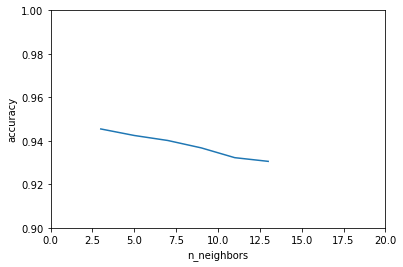

0.9455
{'n_neighbors': 3}


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
n_neighbors = [3,5,7,9,11,13]
param_grid = {

    'n_neighbors':[3,5,7,9,11,13],

}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid, cv=5)
gs.fit(X_train, y_train)
scores = gs.cv_results_['mean_test_score']

plt.plot(n_neighbors, scores)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xlim(0, 20)
plt.ylim(0.9, 1)
plt.show()
print(gs.best_score_)
print(gs.best_params_)

*****CONFUSION MATRIX*****

/Users/abdelrahmanibrahim/miniforge3/envs/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


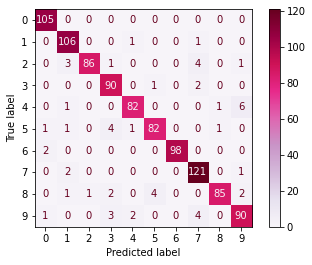

In [5]:
from sklearn.metrics import plot_confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
plot_confusion_matrix(knn, X_test, y_test,cmap="PuRd")
plt.show()

*****FINAL METRICS*****

In [4]:
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score, roc_curve, accuracy_score, \
    f1_score

y_pred = knn.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))

def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

print("specificity:", specificity_score(y_test, y_pred))

accuracy: 0.945
specificity: 1.0
